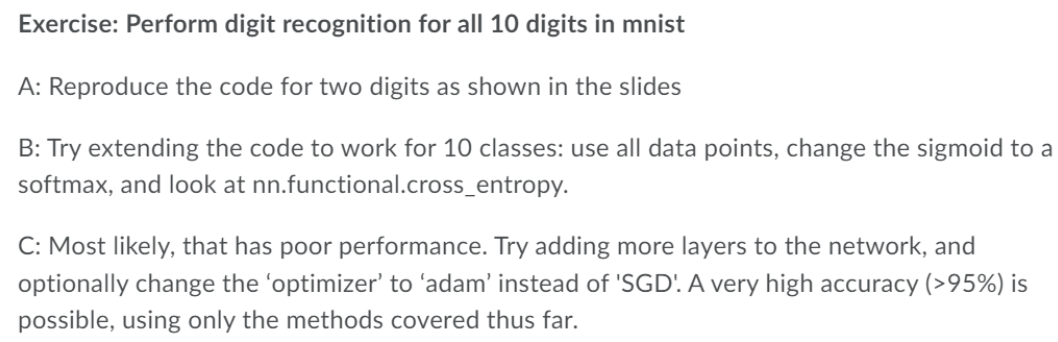

In [14]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from mlxtend.data import mnist_data
import sklearn.model_selection
import numpy as np

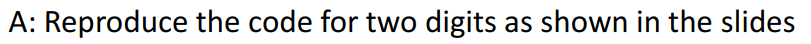

In [15]:
X, y = mnist_data()

#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

#Create test and training data
Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

#Transform into pytorch datasets
trainDataset = torch.utils.data.TensorDataset(torch.tensor(Xtrain).float(), torch.tensor(ytrain).float())
testDataset = torch.utils.data.TensorDataset(torch.tensor(Xtest).float(), torch.tensor(ytest).float())


In [19]:
class logRegresion(nn.Module):
    def __init__(self):
        super(logRegresion,self).__init__()
        self.inputLayer = nn.Linear(784, 1, bias=True)
        
    def forward(self,x):
        x = self.inputLayer(x)
        x = torch.sigmoid(x)
        return torch.squeeze(x)

In [20]:
testData = torch.rand((20,784))
testNet = logRegresion()
testNet.forward(testData)

tensor([0.4141, 0.4311, 0.5246, 0.4153, 0.4359, 0.4570, 0.5050, 0.5142, 0.4047,
        0.4973, 0.4349, 0.5328, 0.4457, 0.4414, 0.4444, 0.5478, 0.4973, 0.4735,
        0.4745, 0.4409], grad_fn=<SqueezeBackward0>)

In [86]:
#setup training and run
nEpochs = 10
learningRate = 0.001
batchSize = 64

trainDataLoader = torch.utils.data.DataLoader(trainDataset, batch_size=batchSize, shuffle=True)

model = logRegresion()

optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# We ise the binary cross entropy loss (like we did in the numpy example)

loss_fn = nn.BCELoss()

# Do the actual training
accuracy = np.zeros(nEpochs)
for iEpoch in range(nEpochs):
    estimatedLabels = np.empty((0,))
    trueLabels = np.empty((0,))
    for Xbatch, ybatch in trainDataLoader:
        y_pred = model(Xbatch)

        loss = loss_fn(y_pred, ybatch)

        # Zero the gradients before running the backward pass.
        model.zero_grad()

        loss.backward()

        optimizer.step()

        #calculate accuracy for whole training set:
        yhat = y_pred > 0.5
        estimatedLabels = np.append(estimatedLabels, yhat)
        trueLabels = np.append(trueLabels, ybatch)
    accuracy[iEpoch] = np.mean(estimatedLabels == trueLabels)

In [87]:
accuracy

array([0.94      , 0.99428571, 0.99571429, 0.99571429, 0.99571429,
       0.99571429, 0.99571429, 0.99571429, 0.99571429, 0.99571429])

In [88]:
# Test performance:
testDataLoader = torch.utils.data.DataLoader(testDataset, batch_size=batchSize, shuffle=True)

estimatedLabels = np.empty((0,))
trueLabels = np.empty((0,))
for Xbatch, ybatch in testDataLoader:
    y_pred = model(Xbatch)

    #calculate accuracy for whole training set:
    yhat = y_pred > 0.5
    estimatedLabels = np.append(estimatedLabels, yhat)
    trueLabels = np.append(trueLabels, ybatch)

testAccuracy = np.mean(estimatedLabels == trueLabels)
print(testAccuracy)

0.99


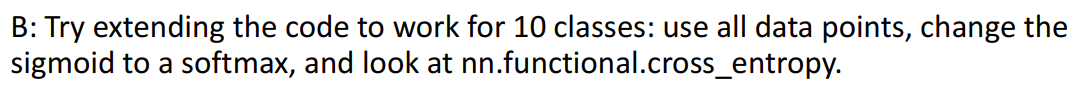

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
print(training_data)

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

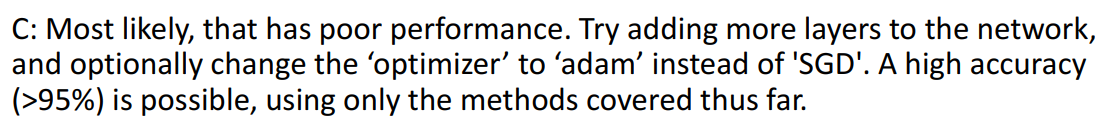